In [1]:
import subprocess
import sys

subprocess.call([sys.executable, '-m', 'pip', 'install', 'pointgrid '])

0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataIn  = pd.read_csv("data/location_table.csv")

In [10]:
dataIn.head()

,Unnamed: 0,id,long,lat
0,1,-110.0472 37.60413,-110.0472,37.60413
1,40,-110.0461 37.60334,-110.0461,37.60334
2,79,-110.0458 37.60308,-110.0458,37.60308
3,118,-110.0393 37.60519,-110.0393,37.60519
4,157,-110.0389 37.60545,-110.0389,37.60545


In [13]:
longlat = dataIn.iloc[:,2:4]

In [16]:
from sklearn import datasets

# create fake data
arr, labels = datasets.make_blobs(n_samples=1000, centers=5)


In [35]:
print(arr.shape)
coord_array = np.array(longlat)

(1000, 2)


In [41]:
print(arr.dtype)
print(coord_array.dtype)

float64
float64


In [33]:
coord_array = np.zeros(shape = longlat.shape[0])
for i in range(0, longlat.shape[0]):
    coord_array[i] = np.array [longlat.iloc[i,0], longlat.iloc[i,1]]

ValueError: setting an array element with a sequence.

In [36]:
print(arr[0:4])
print(coord_array[0:4])
print(labels[0:5])


[[ 2.58392675 -8.38815513]
 [-2.72601352  4.13633223]
 [-4.76211822  3.89924789]
 [-1.53251513 -2.54345262]]
[[-110.0472    37.60413]
 [-110.0461    37.60334]
 [-110.0458    37.60308]
 [-110.0393    37.60519]]
[0 1 1 3 3]


In [42]:
from pointgrid import align_points_to_grid

hexpoints = align_points_to_grid(arr)
hexpoints2 = align_points_to_grid(coord_array)

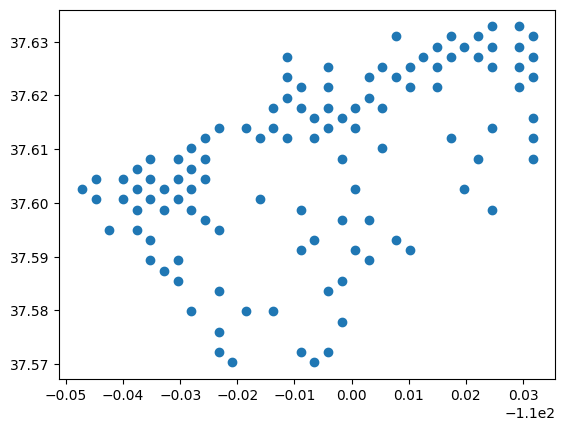

In [48]:
plt.scatter(x = hexpoints2[:,0], y = hexpoints2[:,1])



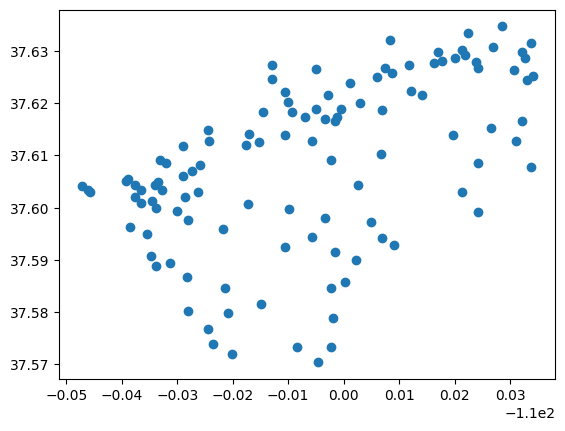

In [47]:
plt.scatter(x = coord_array[:,0], y = coord_array[:,1])


In [49]:
dataIn['hex_long'] = hexpoints2[:,0]
dataIn['hex_lat'] = hexpoints2[:,1]

In [52]:
dataIn = dataIn.iloc[:,1:6]

In [53]:
dataIn.head()

,id,long,lat,hex_long,hex_lat
0,-110.0472 37.60413,-110.0472,37.60413,-110.047200,37.602550
1,-110.0461 37.60334,-110.0461,37.60334,-110.044809,37.604445
2,-110.0458 37.60308,-110.0458,37.60308,-110.044809,37.600655
3,-110.0393 37.60519,-110.0393,37.60519,-110.037635,37.606339
4,-110.0389 37.60545,-110.0389,37.60545,-110.040026,37.604445


In [54]:
dataIn.to_csv('location_table_complete.csv')